<a href="https://colab.research.google.com/github/christine127/Portfolio_Recommendation_Project/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend --upgrade

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import mlxtend

In [4]:
path ='/content/drive/MyDrive/소회의실 프로젝트/전처리_완료/'
file = pd.read_csv(path + '원본_brif_공모수정.csv', encoding ='cp949')
customer_info = pd.read_csv(path+'클러스터링_고객구분코드.csv' )

In [5]:
customer_info

,고객구분코드,동일나이군구분코드,총매수금액,총매수수량,업종개수,large_cap,medium_cap,small_cap,large_cap_period,PER,PBR,ROE,EPS,ATR_7,cluster
0,A000973,0.0,-0.188454,-0.220015,-0.8,0.798295,-0.550775,-0.356546,-0.391667,-0.137600,-0.399572,1.284474,4.487079,2.107561,2
1,A00013780,0.0,1.012451,0.214668,-0.6,0.520765,-0.066435,-0.356546,-0.386667,4.516943,3.510591,0.905693,0.058723,2.319570,4
2,A0009975,1.0,-0.298310,-0.216960,-1.0,-0.629170,1.940399,-0.356546,-0.666667,-0.397684,-0.403039,-0.469574,1.924817,-0.440116,2
3,A00012551,0.0,1.202118,3.247517,1.8,-0.629170,0.539688,0.959189,-0.666667,0.397516,-0.348721,1.578465,-0.148041,-0.462189,2
4,A000706,-0.5,-0.229829,1.138273,0.0,-0.165281,-0.550775,1.223045,-0.666667,-0.335217,-0.451078,-0.404407,0.000165,-0.585511,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,A00011326,0.0,0.207308,3.671505,-0.2,0.261436,-0.152156,0.149091,0.283333,-0.028248,-0.551939,1.174691,0.358817,0.316181,2
7934,A000162,-0.5,6.608258,3.763178,0.0,-0.418166,-0.199783,1.307901,0.233333,-0.056973,0.632808,-0.211370,-0.200899,0.325801,0
7935,A0004156,-0.5,-0.273831,-0.227655,-0.8,0.690608,-0.362841,-0.356546,0.197470,0.131442,-0.413144,1.513316,2.317100,1.925226,2
7936,A00021187,0.0,-0.256647,-0.223835,-0.6,0.611933,-0.225541,-0.356546,-0.216667,-0.232764,-0.340779,0.234008,2.383798,0.863129,2


In [6]:
cluster_dict = customer_info.set_index('고객구분코드')['cluster'].to_dict()
file['cluster'] = file['고객구분코드'].map(cluster_dict).astype(str)

In [7]:
file['code'] = file['상품번호'].str[-6:]

In [8]:
file= file.dropna()

## FP-Growth 전처리: 
[[cluster, 종목명],[cluster, 종목명],[cluster, 종목명]] 

### 전체

In [74]:
lst2 = list(file.groupby('고객구분코드')['상품명'].unique().agg(list) + file.groupby('고객구분코드')['cluster'].unique().agg(list))

In [75]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary2 = te.fit(lst2).transform(lst2)
df2 = pd.DataFrame(te_ary2, columns=te.columns_)
df2

,(주)마이크로컨텍솔루션,(주)스카이이앤엠,(주)포스코엠텍,0.0,1.0,2.0,3.0,4.0,AJ네트웍스보통주,AK홀딩스보통주,BGF리테일보통주,BGF보통주,BNK금융지주보통주,CJ1우선주,CJ4우선주(전환),CJ보통주,CJ씨푸드1우선주,CJ씨푸드보통주,CMG제약,DB Inc.보통주,DB금융투자보통주,DB손해보험보통주,DB하이텍보통주,DGB금융지주보통주,DI동일보통주,DL1우선주,DL건설보통주,DL보통주,DSR보통주,E1보통주,ES큐브,F&F보통주,GS1우선주,GS건설보통주,GS보통주,HDC보통주,HDC현대산업개발보통주,IHQ보통주,JB금융지주보통주,JW생명과학보통주,...,화승엔터프라이즈보통주,화승인더스트리보통주,화신보통주,화신정공,화인베스틸보통주,화일약품,화천기계보통주,환인제약보통주,황금에스티보통주,효성보통주,효성아이티엑스 보통주,효성오앤비,효성중공업보통주,효성첨단소재보통주,효성화학보통주,후성 보통주,휘닉스소재,휠라홀딩스보통주,휴네시온,휴니드테크놀러지스보통주,휴림로봇,휴마시스,휴맥스,휴먼엔,휴메딕스,휴비스보통주,휴비츠,휴스틸보통주,휴온스,휴온스글로벌,휴젤,휴켐스보통주,흥구석유,흥국에프엔비,흥국화재해상보험1우선주,흥국화재해상보험2우선주(신형),흥국화재해상보험보통주,흥아해운보통주,희림종합건축사사무소,힘스
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7994,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [77]:
file

,Unnamed: 0,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,date,code,stock_type,업종명,상하한가여부,PER,PBR,ROE,EPS,DIV,외국인_순매수액,기관_순매수액,외국인_매도매수구분코드,기관_매도매수구분코드,TR,ATR_7,ATR_14,신규종목여부,cluster
0,0,A00010002,2020-03-04,2,20,대전,1,00000A005930,삼성전자보통주,2,2,1,56300,9,9,506700,55400,54800,57600,54600,57400,24274056,1377290000000,0,0,2020-03-04,005930,large_cap,전기전자,0,8.88,1.62,5.481481,6461.0,2.47,1.746511e+11,-5.908078e+10,2,1,3000.0,1942.857143,1750.000000,0,2.0
1,1,A00010002,2020-03-10,2,20,대전,1,00000A294140,레몬,3,2,1,12550,23,23,288650,11800,12700,13400,10150,10600,24276359,290689000000,0,0,2020-03-10,294140,kosdaq_cap,화학,0,0.00,12.38,0.000000,0.0,0.00,-1.579992e+08,-1.353072e+09,1,1,3250.0,1890.000000,0.000000,1,2.0
2,2,A00010002,2020-03-12,2,20,대전,3,00000A294140,레몬,3,1,1,12050,10,10,120500,11150,11150,12250,10650,11850,10872467,126434000000,0,0,2020-03-12,294140,kosdaq_cap,화학,0,0.00,13.84,0.000000,0.0,0.00,-4.785265e+07,-4.147980e+07,1,1,1600.0,1761.428571,0.000000,1,2.0
3,3,A00010002,2020-03-13,2,20,대전,1,00000A096530,씨젠,3,2,1,49400,5,5,247000,56500,55600,57500,46400,49350,7685239,385649000000,0,0,2020-03-13,096530,kosdaq_cap,제약,0,130.56,9.41,13.874601,378.0,0.00,5.698348e+09,-6.293640e+09,2,1,11100.0,10792.857143,7021.428571,0,2.0
4,4,A00010002,2020-03-23,2,20,대전,1,00000A002720,국제약품보통주,2,1,1,4600,40,40,184000,4410,4410,5200,4410,5200,5827357,27592475085,0,0,2020-03-23,002720,small_cap,의약품,0,41.27,1.39,29.690647,126.0,0.58,-9.060532e+08,2.332210e+06,1,2,790.0,720.714286,632.500000,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273506,273506,A0009995,2020-03-23,1,30,인천,2,00000A004020,현대제철 보통주,2,2,1,12900,33,33,425700,13700,12800,13750,12400,13150,952577,12398876450,0,0,2020-03-23,004020,large_cap,철강금속,0,4.33,0.11,39.363636,3037.0,5.70,-3.377997e+08,-5.053098e+08,1,1,1350.0,1842.857143,1517.857143,0,2.0
273507,273507,A0009995,2020-03-23,1,30,인천,3,00000A002800,신신제약,3,1,1,6750,2,2,13500,7000,6930,6930,6370,6720,2178510,14480057840,0,0,2020-03-23,002800,kosdaq_cap,제약,0,35.18,1.87,18.812834,191.0,0.49,7.517056e+07,2.201800e+07,2,2,630.0,1137.857143,721.785714,0,2.0
273508,273508,A0009995,2020-03-13,1,30,인천,1,00000A143210,핸즈코퍼레이션보통주,2,1,1,5950,10,10,59500,6240,6130,6130,5490,5920,33300,192174890,0,0,2020-03-13,143210,small_cap,운수장비,0,30.52,0.40,76.300000,194.0,1.69,-1.204244e+07,6.144381e+07,1,2,750.0,385.714286,300.714286,0,2.0
273509,273509,A0009997,2020-03-03,1,20,경기,1,00000A238490,힘스,3,2,1,20400,1,1,20400,19750,20600,20750,19600,19600,55008,1108298550,0,0,2020-03-03,238490,kosdaq_cap,반도체,0,0.00,2.11,0.000000,0.0,0.00,-2.522890e+08,5.419900e+06,1,2,1150.0,1578.571429,1346.428571,0,2.0


In [76]:
from mlxtend.frequent_patterns import fpgrowth
fp_whole = fpgrowth(df2, min_support=0.1,use_colnames=True)
fp_whole.sort_values('support',ascending =False)

,support,itemsets
0,0.802326,(2.0)
3,0.512128,(삼성전자보통주)
15,0.413353,"(삼성전자보통주, 2.0)"
4,0.260315,(씨젠)
1,0.185296,(삼성전자1우선주)
16,0.170418,"(씨젠, 2.0)"
5,0.161040,(이원다이애그노믹스)
13,0.155789,"(삼성전자1우선주, 2.0)"
6,0.149662,(신풍제약보통주)
17,0.149537,"(삼성전자보통주, 씨젠)"


### 0번 군집

In [58]:
lst0 = file.loc[file['cluster']=='0.0'].groupby('고객구분코드')['상품명'].unique().agg(list)
te_ary0 = te.fit(lst0).transform(lst0)
df0 = pd.DataFrame(te_ary0, columns=te.columns_)
df0

,(주)스카이이앤엠,(주)포스코엠텍,AJ네트웍스보통주,AK홀딩스보통주,BGF보통주,BNK금융지주보통주,CJ1우선주,CJ보통주,CJ씨푸드1우선주,CJ씨푸드보통주,CMG제약,DB Inc.보통주,DB손해보험보통주,DB하이텍보통주,DGB금융지주보통주,DI동일보통주,DL보통주,ES큐브,F&F보통주,GS건설보통주,GS보통주,HDC보통주,HDC현대산업개발보통주,IHQ보통주,JW중외제약1우선주,JW중외제약보통주,JW홀딩스 보통주,KB금융지주 보통주,KCTC 보통주,KH 필룩스보통주,KR모터스보통주,LF보통주,LG디스플레이보통주,LG보통주,LG상사보통주,LG생활건강1우선주,LG생활건강보통주,LG유플러스보통주,LG이노텍보통주,LG전자1우선주,...,현대코퍼레이션보통주,현대퓨처넷보통주,현대해상화재보험보통주,현대홈쇼핑보통주,현우산업,현진소재,형지엘리트보통주,호텔신라1우선주,호텔신라보통주,화성밸브,화승엔터프라이즈보통주,화승인더스트리보통주,화신정공,화인베스틸보통주,화일약품,화천기계보통주,환인제약보통주,황금에스티보통주,효성보통주,효성중공업보통주,효성화학보통주,후성 보통주,휘닉스소재,휠라홀딩스보통주,휴네시온,휴림로봇,휴마시스,휴먼엔,휴메딕스,휴비스보통주,휴비츠,휴온스,휴젤,흥구석유,흥국에프엔비,흥국화재해상보험1우선주,흥국화재해상보험2우선주(신형),흥국화재해상보험보통주,흥아해운보통주,힘스
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [59]:
from mlxtend.frequent_patterns import fpgrowth
fp_0 = fpgrowth(df0, min_support=0.1,use_colnames=True)
fp_0.sort_values('support',ascending =False)

,support,itemsets
28,0.460899,(삼성전자보통주)
0,0.399334,(씨젠)
1,0.307820,(신풍제약보통주)
17,0.281198,(랩지노믹스)
23,0.264559,(이원다이애그노믹스)
...,...,...
74,0.103161,"(이원다이애그노믹스, 씨젠, 랩지노믹스)"
62,0.103161,"(씨젠, 바이오니아)"
53,0.101498,"(와이비엠넷, 진원생명과학보통주)"
57,0.101498,"(파미셀보통주, 랩지노믹스)"


### 1번 군집

In [56]:
lst1 = file.loc[file['cluster']=='1.0'].groupby('고객구분코드')['상품명'].unique().agg(list)
te_ary1 = te.fit(lst1).transform(lst1)
df1 = pd.DataFrame(te_ary1, columns=te.columns_)

In [57]:
from mlxtend.frequent_patterns import fpgrowth
fp_1 = fpgrowth(df1, min_support=0.1,use_colnames=True)
fp_1.sort_values('support',ascending =False)

,support,itemsets
0,0.500000,(씨젠)
46,0.400000,(신풍제약보통주)
7,0.400000,(삼성전자보통주)
8,0.384615,(웰크론)
1,0.369231,(이원다이애그노믹스)
...,...,...
51,0.100000,(이씨에스텔레콤)
53,0.100000,(지코보통주)
54,0.100000,(에스케이하이닉스보통주)
320,0.100000,"(모트렉스, 와이비엠넷)"


### 2번 군집

In [65]:
lst2 = file.loc[file['cluster']=='2.0'].groupby('고객구분코드')['상품명'].unique().agg(list)
te_ary2 = te.fit(lst2).transform(lst2)
df2 = pd.DataFrame(te_ary2, columns=te.columns_)

In [66]:
from mlxtend.frequent_patterns import fpgrowth
fp_2 = fpgrowth(df2, min_support=0.1,use_colnames=True)
fp_2.sort_values('support',ascending =False)

,support,itemsets
1,0.515194,(삼성전자보통주)
2,0.212405,(씨젠)
0,0.194172,(삼성전자1우선주)
3,0.148356,(이원다이애그노믹스)
4,0.131837,(신풍제약보통주)
6,0.131526,(수젠텍)
10,0.121085,"(삼성전자보통주, 씨젠)"
7,0.112669,(랩지노믹스)
9,0.107527,"(삼성전자1우선주, 삼성전자보통주)"
8,0.106436,(파미셀보통주)


### 3번 군집

In [61]:
lst3 = file.loc[file['cluster']=='3.0'].groupby('고객구분코드')['상품명'].unique().agg(list)
te_ary3 = te.fit(lst3).transform(lst3)
df3 = pd.DataFrame(te_ary3, columns=te.columns_)

In [1]:
from mlxtend.frequent_patterns import fpgrowth
fp_3 = fpgrowth(df3, min_support=0.1,use_colnames=True)
fp_3.sort_values('support',ascending =False)

NameError: ignored

### 4번 군집

In [63]:
lst4 = file.loc[file['cluster']=='4.0'].groupby('고객구분코드')['상품명'].unique().agg(list)
te_ary4 = te.fit(lst4).transform(lst4)
df4 = pd.DataFrame(te_ary4, columns=te.columns_)

In [64]:
from mlxtend.frequent_patterns import fpgrowth
fp_4 = fpgrowth(df4, min_support=0.1,use_colnames=True)
fp_4.sort_values('support', ascending= False)

,support,itemsets
2,0.562663,(삼성전자보통주)
5,0.510444,(씨젠)
6,0.297650,(카카오보통주)
15,0.297650,"(삼성전자보통주, 씨젠)"
16,0.215405,"(삼성전자보통주, 카카오보통주)"
0,0.163185,(셀트리온보통주)
3,0.159269,(삼성전자1우선주)
1,0.148825,(이원다이애그노믹스)
12,0.147520,(에스케이하이닉스보통주)
7,0.142298,(수젠텍)


In [48]:
customer_info['cluster'].value_counts()

2    6417
4     766
0     601
1     130
3      24
Name: cluster, dtype: int64

## SNA 전처리:
: from(source) to(target) weight
<br> https://www.python2.net/questions-1025111.htm

In [ ]:
lst = [
    ['a', 'b'],
    ['b', 'c', 'd', 'e'],
    ['a', 'd'],
    ['b', 'e']
]
u = pd.get_dummies(pd.DataFrame(lst), prefix='', prefix_sep='').sum(level=0, axis=1)

In [ ]:
pd.DataFrame(lst)

,0,1,2,3
0,a,b,None,None
1,b,c,d,e
2,a,d,None,None
3,b,e,None,None


In [ ]:
lst = list(file.groupby('고객번호')['code'].unique().agg(list))
u = pd.get_dummies(pd.DataFrame(lst), prefix='', prefix_sep='').sum(level=0, axis=1)
v = u.T.dot(u)

In [ ]:
v.values[np.tril(np.ones(v.shape)).astype(np.bool)] = 0
print(v)

        014160  069500  008970  016360  ...  192650  014940  004020  096530
014160       0       0       1       0  ...       0       1       1       1
069500       0       0       0       1  ...       1       0       0       0
008970       0       0       0       0  ...       0       1       1       1
016360       0       0       0       0  ...       1       0       0       0
228790       0       0       0       0  ...       0       0       0       0
011780       0       0       0       0  ...       1       0       0       0
141020       0       0       0       0  ...       0       1       1       1
305720       0       0       0       0  ...       0       0       0       0
030000       0       0       0       0  ...       1       0       0       0
058530       0       0       0       0  ...       0       1       1       1
005380       0       0       0       0  ...       1       0       0       0
015020       0       0       0       0  ...       0       1       1       1
002360      

In [ ]:
a = v.stack()
a = a[a >= 1].rename_axis(('source', 'target')).reset_index(name='weight') #데이터 오면 1 바꾸기
print(a)

    source  target  weight
0   014160  008970       1
1   014160  141020       1
2   014160  058530       1
3   014160  015020       1
4   014160  002360       1
5   014160  014940       1
6   014160  004020       1
7   014160  096530       1
8   069500  016360       1
9   069500  228790       1
10  069500  011780       1
11  069500  305720       1
12  069500  030000       1
13  069500  005380       1
14  069500  192650       1
15  008970  141020       1
16  008970  058530       1
17  008970  015020       1
18  008970  002360       1
19  008970  014940       1
20  008970  004020       1
21  008970  096530       1
22  016360  011780       1
23  016360  030000       1
24  016360  005380       1
25  016360  192650       1
26  228790  305720       1
27  011780  030000       1
28  011780  005380       1
29  011780  192650       1
30  141020  058530       1
31  141020  015020       1
32  141020  002360       1
33  141020  014940       1
34  141020  004020       1
35  141020  096530       1
3

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(a,  edge_attr=True)
print (nx.to_dict_of_dicts(G))


{'014160': {'008970': {'weight': 1}, '141020': {'weight': 1}, '058530': {'weight': 1}, '015020': {'weight': 1}, '002360': {'weight': 1}, '014940': {'weight': 1}, '004020': {'weight': 1}, '096530': {'weight': 1}}, '008970': {'014160': {'weight': 1}, '141020': {'weight': 1}, '058530': {'weight': 1}, '015020': {'weight': 1}, '002360': {'weight': 1}, '014940': {'weight': 1}, '004020': {'weight': 1}, '096530': {'weight': 1}}, '141020': {'014160': {'weight': 1}, '008970': {'weight': 1}, '058530': {'weight': 1}, '015020': {'weight': 1}, '002360': {'weight': 1}, '014940': {'weight': 1}, '004020': {'weight': 1}, '096530': {'weight': 1}}, '058530': {'014160': {'weight': 1}, '008970': {'weight': 1}, '141020': {'weight': 1}, '015020': {'weight': 1}, '002360': {'weight': 1}, '014940': {'weight': 1}, '004020': {'weight': 1}, '096530': {'weight': 1}}, '015020': {'014160': {'weight': 1}, '008970': {'weight': 1}, '141020': {'weight': 1}, '058530': {'weight': 1}, '002360': {'weight': 1}, '014940': {'wei

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# -*- encoding: utf-8 -*-
import pandas as pd
import networkx as nx
import operator
import numpy as np

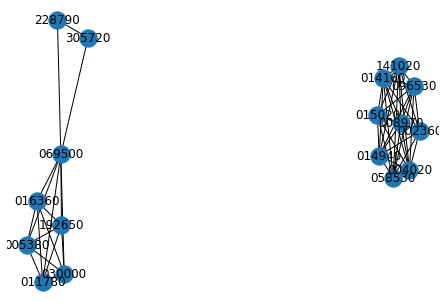

In [ ]:
g = nx.from_pandas_edgelist(a, 'source', 'target', create_using = nx.Graph())
nx.draw(g, with_labels=True)
# print(nx.info(g))
dgr = nx.degree_centrality(g)        # 연결 중심성
btw = nx.betweenness_centrality(g)   # 매개 중심성
cls = nx.closeness_centrality(g)     # 근접 중심성
egv = nx.eigenvector_centrality(g)   # 고유벡터 중심성
pgr = nx.pagerank(g)                 # 페이지 랭크

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

G = nx.Graph()

for i in range(len(sorted_dgr)):
    G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

# for ind in range((len(np.where(dataset['freq'] > 20000)[0]))):
#     G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

# 노드 크기 조정
sizes = [G.nodes[node]['nodesize'] * 500 for node in G]

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}



In [ ]:


# plt.figure(figsize=(20, 20))
# pos = nx.spring_layout(g, k = 0.15)
# nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue')
# plt.show()